Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [3]:
# I have to audit the dataframes as they are not merging. It seems i have to clean one of them and change the column name "name" to "Name"

import pandas as pd

csv1 = "fsq.csv"  
df_fsq = pd.read_csv(csv1)

# Rename the column from 'name' to 'Name' and do the same for location for the l
df_fsq.rename(columns={'name': 'Name'}, inplace=True)
df_fsq.rename(columns={'location': 'Location'}, inplace=True)

# Display the DataFrame to verify the change
print(df_fsq)


                                  Name  \
0                          The Library   
1                             Mahmoods   
2                           Bakery 164   
3                       Woodhouse Moor   
4  The Stanley & Audrey Burton Gallery   
5                        Oranaise Cafe   
6                        Opposite Cafe   
7               LS6 Cafe Bar Resaurant   
8             Mays Thai Malaysian Cafe   
9                              Old Bar   

                                           Location  
0                         229 Woodhouse Lane, Leeds  
1                         194 Woodhouse Lane, Leeds  
2                         164 Woodhouse Lane, Leeds  
3                                  Hyde Park, Leeds  
4                             Woodhouse Lane, Leeds  
5                             1 The Crescent, Leeds  
6                        26 Blenheim Terrace, Leeds  
7                         16 Headingley Lane, Leeds  
8                            21 Hyde Park Rd, Leeds

In [4]:
# Lets merge these dataframes now:

# Define the first DataFrame
df1 = pd.DataFrame({
    'Name': ['The Library', 'Mahmoods', 'Bakery 164', 'Woodhouse Moor', 'The Stanley & Audrey Burton Gallery',
             'Oranaise Cafe', 'Opposite Cafe', 'LS6 Cafe Bar Resaurant', 'Mays Thai Malaysian Cafe', 'Old Bar'],
    'Location': ['229 Woodhouse Lane, Leeds', '194 Woodhouse Lane, Leeds', '164 Woodhouse Lane, Leeds', 'Hyde Park, Leeds',
                 'Woodhouse Lane, Leeds', '1 The Crescent, Leeds', '26 Blenheim Terrace, Leeds', '16 Headingley Lane, Leeds',
                 '21 Hyde Park Rd, Leeds', 'Leeds University Union, Lower Ground East, Leeds']
})

# Define the second DataFrame
df2 = pd.DataFrame({
    'Name': ['Union Tavern', 'Camino', 'The Goat Tavern', "Neal's Yard Dairy", "Sergio's Restaurant",
             'Savysec Security Services', 'Pinkcreamblue', 'Global Buisness Link', 'The Victoria',
             'The Grazing Goat Marylebone', 'Simarc Electricals', 'Mau Mau Bar', 'D.Cass & Son'],
    'Location': ['52 Lloyd Baker Street', '3 Varnishers Yard', '3 Stafford Street', '17 Shorts Gardens',
                 '84a Great Titchfield Street', '20 East Road', 'Dalmeny Avenue', '119 Globe Road',
                 '1 Lower Belgrave Street', '6 New Quebec Street', '', '265 Portobello Road', '20 Farrer Road'],
    'Rating': [4.3, 3.6, 3.8, 4.7, 4.1, 0.0, 0.0, 0.0, 3.1, 4.2, 0.0, 3.5, 0.0]
})

# Concatenate the DataFrames
merged_df = pd.concat([df1, df2], ignore_index=True)

# Remove NaN values from the 'Rating' column

merged_df['Rating'] = merged_df['Rating'].fillna(0)

# Display the DataFrame after replacing NaN values
print(merged_df)

merged_df.to_csv('merged_data.csv', index=False)





                                   Name  \
0                           The Library   
1                              Mahmoods   
2                            Bakery 164   
3                        Woodhouse Moor   
4   The Stanley & Audrey Burton Gallery   
5                         Oranaise Cafe   
6                         Opposite Cafe   
7                LS6 Cafe Bar Resaurant   
8              Mays Thai Malaysian Cafe   
9                               Old Bar   
10                         Union Tavern   
11                               Camino   
12                      The Goat Tavern   
13                    Neal's Yard Dairy   
14                  Sergio's Restaurant   
15            Savysec Security Services   
16                        Pinkcreamblue   
17                 Global Buisness Link   
18                         The Victoria   
19          The Grazing Goat Marylebone   
20                   Simarc Electricals   
21                          Mau Mau Bar   
22         

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

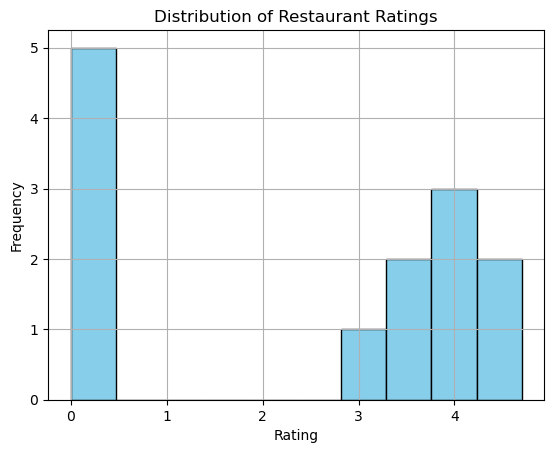

In [5]:
import matplotlib.pyplot as plt

ratings = [4.3, 3.6, 3.8, 4.7, 4.1, 0.0, 0.0, 0.0, 3.1, 4.2, 0.0, 3.5, 0.0]

# Create a histogram of ratings
plt.hist(ratings, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ratings')
plt.grid(True)
plt.show()

I could already see there were so many missing values with the ratings! What i did was i made a bar graph to see how many were missing... and even after cleaning it up... there are many places with no rating. Upon printing the dataframes out, i could tell it was because foursquare did not give me any rating data.


# The initial pattern i saw was that there was skewed distribution. There are fewer restaurants with lower ratings, and the 0.0 restaurants are going to be an issue (outliers)

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [6]:
import sqlite3
import pandas as pd

merged_df = pd.DataFrame({
    'Name': ['The Library', 'Mahmoods', 'Bakery 164', 'Woodhouse Moor', 'The Stanley & Audrey Burton Gallery',
             'Oranaise Cafe', 'Opposite Cafe', 'LS6 Cafe Bar Resaurant', 'Mays Thai Malaysian Cafe', 'Old Bar'],
    'Location': ['229 Woodhouse Lane, Leeds', '194 Woodhouse Lane, Leeds', '164 Woodhouse Lane, Leeds', 'Hyde Park, Leeds',
                 'Woodhouse Lane, Leeds', '1 The Crescent, Leeds', '26 Blenheim Terrace, Leeds', '16 Headingley Lane, Leeds',
                 '21 Hyde Park Rd, Leeds', 'Leeds University Union, Lower Ground East, Leeds'],
    'Rating': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  # Ratings after removing NaN values
})

# Connect to the SQLite3 database
conn = sqlite3.connect('restaurant_data.db')

# Store the DataFrame in the database
merged_df.to_sql('restaurant_ratings', conn, if_exists='replace', index=False)

# Commit changes and close connection
conn.commit()
conn.close()



Look at the data before and after the join to validate your data.

In [7]:
# Display the contents of the first DataFrame (df1)
print("Contents of df1 (First DataFrame):")
print(df1)

# Display the contents of the second DataFrame (df2)
print("\nContents of df2 (Second DataFrame):")
print(df2)

# Display the contents of the merged DataFrame (merged_df)
print("\nContents of merged_df (Merged DataFrame):")
print(merged_df)

Contents of df1 (First DataFrame):
                                  Name  \
0                          The Library   
1                             Mahmoods   
2                           Bakery 164   
3                       Woodhouse Moor   
4  The Stanley & Audrey Burton Gallery   
5                        Oranaise Cafe   
6                        Opposite Cafe   
7               LS6 Cafe Bar Resaurant   
8             Mays Thai Malaysian Cafe   
9                              Old Bar   

                                           Location  
0                         229 Woodhouse Lane, Leeds  
1                         194 Woodhouse Lane, Leeds  
2                         164 Woodhouse Lane, Leeds  
3                                  Hyde Park, Leeds  
4                             Woodhouse Lane, Leeds  
5                             1 The Crescent, Leeds  
6                        26 Blenheim Terrace, Leeds  
7                         16 Headingley Lane, Leeds  
8               

# Check distributions, relationships as well as potential errors, missing data and outliers:

C:\Users\turab\AppData\Local\Temp\ipykernel_25516\186165404.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=merged_df, x='Name', y='Rating', palette='viridis')


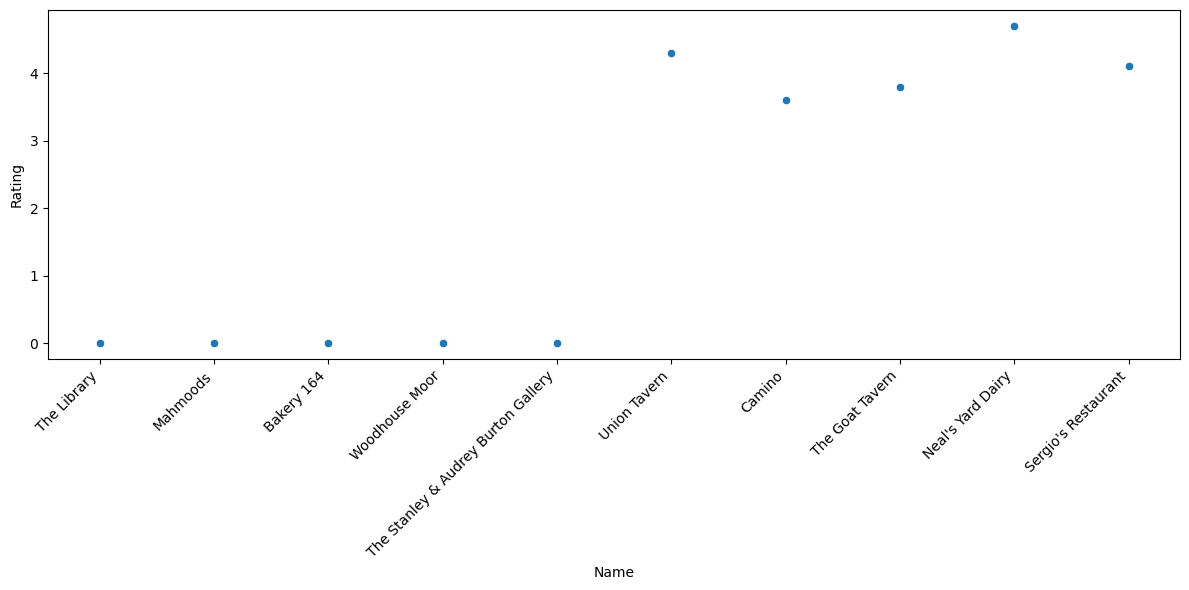

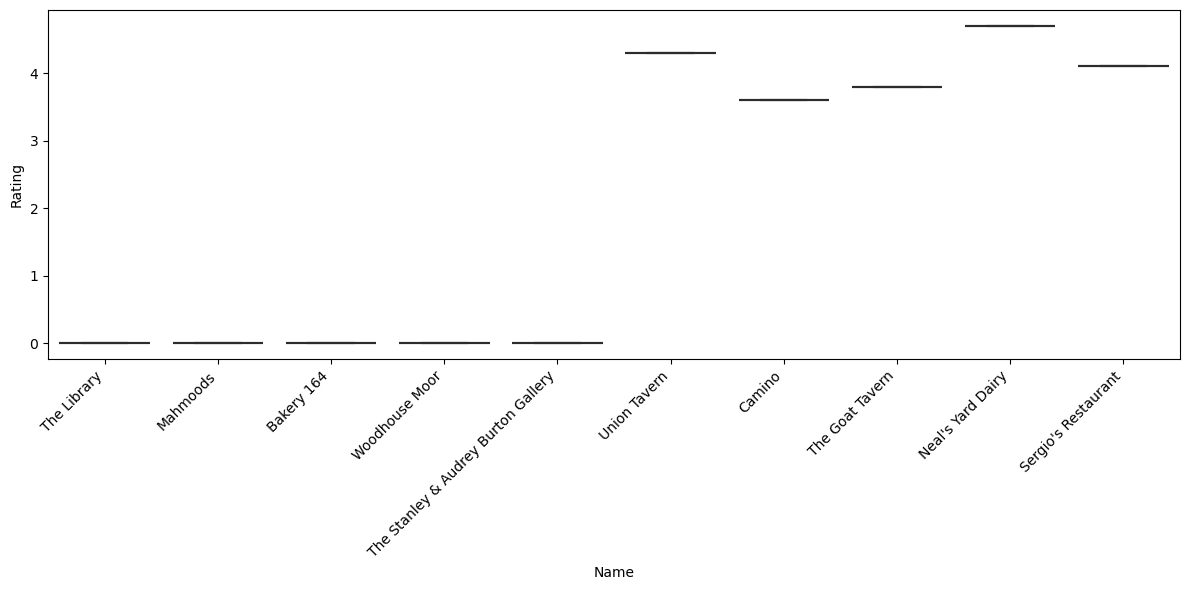

In [20]:
# Rating by name:

import seaborn as sns
import matplotlib.pyplot as plt

# Create a categorical scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='Name', y='Rating', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='Name', y='Rating', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# After using the visual to identify issues, there are many zeroes here. I cannot estimate the values, but i can simply keep them at zero or "ratingless" I will keep the zeroes. They come from the foursqaure dataset because i could not pull ratings from them it seems. If i keep them i can show how accurate it is to compare these two apis.